In [1]:
import pandas as pd

In [2]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

C:\Users\Alex\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt 

In [4]:
#SECOND
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)    #shift=1
    #Compute daily return: exactly same as SP500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [5]:
#THIRD
# input dataframe (having DATE and DAILY_RETURN) -> output series (DATE & DAILY_RETURN)
def backtest_strat(df):
    strategy_ret= df.copy()
    #print(strategy_ret)
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    print(ts)
    return ts

In [6]:
#FIRST
# input string "model_name"(should have csv files 'account_value_trade_{}_{}.csv'.format(model_name,i)) 
#-> retrieve model reuslts -> return df_account_value
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [7]:
#Self-defined: Plotting mean and variance of cumulative returns 
def mean_var_return(daily_return_df):
    plt.style.use('ggplot') #Change/Remove This If you Want

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(daily_return_df.mean(axis=1), alpha=0.5, color='red', label='mean cumulative return', linewidth = 1.0)
    print(daily_return_df.index.values)
    ax.fill_between(daily_return_df.index.values, daily_return_df.mean(axis=1) - daily_return_df.std(axis=1), daily_return_df.mean(axis=1) + daily_return_df.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(daily_return_df.index.values, daily_return_df.mean(axis=1) - 2*daily_return_df.std(axis=1), daily_return_df.mean(axis=1) + 2*daily_return_df.std(axis=1), color='#888888', alpha=0.2)
    ax.legend(loc='best')
    #ax.set_ylim([-0.04,0.04])
    ax.set_ylabel("Cumulative Returns")
    ax.set_xlabel("Time")

In [8]:
import empyrical as ep
def comb_strat_series(strat, ndf):    #'a2cin', 'a2c', 'ensemble' ...
    df_strat_series=pd.DataFrame()
    Sharpe_list = []
    cum_list = []
    for i in range(1, ndf+1):
        temp = pd.read_csv('results/{}_seed_{}/df_account_value_ensemble_daily_return.csv'.format(strat,i))
        sharpe=(252**0.5)*temp.account_value.pct_change(1).mean()/temp.account_value.pct_change(1).std()
        Sharpe_list.append(sharpe)
        #sharpe_comp_series = pd.concat([sharpe_comp_series,temp], axis=1)
        temp = backtest_strat(temp[0:1097])
        cum_rets = ep.cum_returns(temp, 1.0)
        cum_list.append(cum_rets[-1])
        df_strat_series = pd.concat([df_strat_series,cum_rets], axis=1)
    print("sharpes:", Sharpe_list)
    print("rets:", cum_list)
    
    print("average Sharpe ratio:",sum(Sharpe_list)/len(Sharpe_list))
    print("average cumulative return:",sum(cum_list)/len(cum_list))
    #print(df_strat_series)
    #df_strat_series = pd.DataFrame({'daily_return':df_strat_series['daily_return']})
    #print(df_trade_date[63:].reset_index(drop=True))
    #df_strat_series=df_strat_series.join(df_trade_date[63:].reset_index(drop=True))
    return df_strat_series

In [48]:
#daily_return_df = comb_strat_series('a2c', 9)
#mean_var_return(daily_return_df)

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00   -0.000250
2016-01-06 00:00:00+00:00   -0.001708
2016-01-07 00:00:00+00:00   -0.003856
2016-01-08 00:00:00+00:00   -0.002443
                               ...   
2020-05-06 00:00:00+00:00    0.000000
2020-05-07 00:00:00+00:00    0.000000
2020-05-08 00:00:00+00:00    0.000000
2020-05-11 00:00:00+00:00    0.000000
2020-05-12 00:00:00+00:00    0.000000
Length: 1097, dtype: float64
Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00   -0.000027
2016-01-06 00:00:00+00:00   -0.002725
2016-01-07 00:00:00+00:00   -0.004612
2016-01-08 00:00:00+00:00   -0.001614
                               ...   
2020-05-06 00:00:00+00:00    0.000000
2020-05-07 00:00:00+00:00    0.000000
2020-05-08 00:00:00+00:00    0.000000
2020-05-11 00:00:00+00:00    0.000000
2020-05-12 00:00:00+00:00    0.000000
Length: 1097, dtype: float64


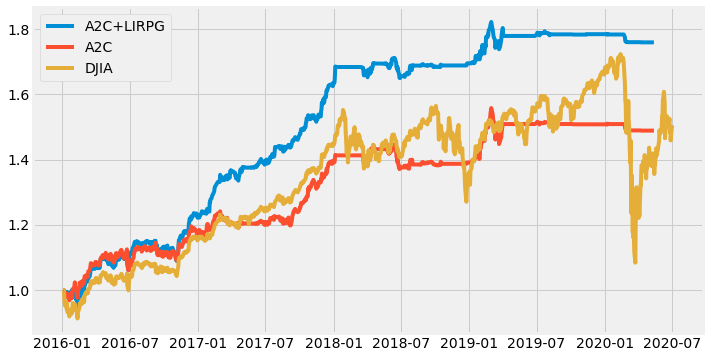

In [63]:
a2cin = pd.read_csv('results/005_a2cin_seed_1_loss/df_account_value_ensemble_daily_return.csv')
a2c = pd.read_csv('results/a2c_seed_6/df_account_value_ensemble_daily_return.csv')
benchmark = dow_strat
benchmark = ep.cum_returns(benchmark, 1.0)
a2cin = backtest_strat(a2cin[0:1097])
a2cin = ep.cum_returns(a2cin, 1.0)
a2c = backtest_strat(a2c[0:1097])
a2c = ep.cum_returns(a2c, 1.0)
plt.figure(figsize=(12,6))
with plt.style.context('fivethirtyeight'):
    plt.plot(a2cin, label = 'A2C+LIRPG')
    plt.plot(a2c, label = 'A2C')
    plt.plot(benchmark, label = 'DJIA')
    plt.legend(framealpha=1, frameon=True)


plt.show()

## DJIA

In [10]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [11]:
test_dji.shape

(1131, 7)

In [12]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [13]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)    #Compute daily returns of DJIA

In [14]:
dow_strat = backtest_strat(test_dji)
dow_strat

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014695
2016-01-07 00:00:00+00:00   -0.023211
2016-01-08 00:00:00+00:00   -0.010152
                               ...   
2020-06-24 00:00:00+00:00   -0.027151
2020-06-25 00:00:00+00:00    0.011776
2020-06-26 00:00:00+00:00   -0.028356
2020-06-29 00:00:00+00:00    0.023196
2020-06-30 00:00:00+00:00    0.008481
Length: 1131, dtype: float64


Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014695
2016-01-07 00:00:00+00:00   -0.023211
2016-01-08 00:00:00+00:00   -0.010152
                               ...   
2020-06-24 00:00:00+00:00   -0.027151
2020-06-25 00:00:00+00:00    0.011776
2020-06-26 00:00:00+00:00   -0.028356
2020-06-29 00:00:00+00:00    0.023196
2020-06-30 00:00:00+00:00    0.008481
Length: 1131, dtype: float64

## Ensemble Strategy

In [15]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [16]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()


In [17]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [18]:
ensemble_account_value = get_account_value('ensemble')

0.8459208692763136


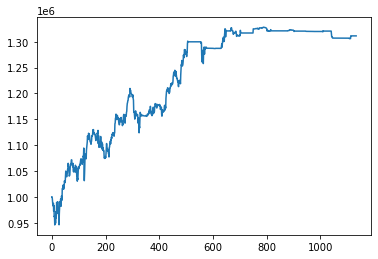

In [19]:
ensemble_account_value.account_value.plot()

In [20]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  0.8459208692763136


In [21]:
ensemble_account_value['Date'] = test_dji['Date']

In [22]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1.000000e+06,20160104,NaN,2016-01-04
1,1.000089e+06,20160105,0.000089,2016-01-05
2,9.961924e+05,20160106,-0.003896,2016-01-06
3,9.878619e+05,20160107,-0.008362,2016-01-07
4,9.828246e+05,20160108,-0.005099,2016-01-08


Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000089
2016-01-06 00:00:00+00:00   -0.003896
2016-01-07 00:00:00+00:00   -0.008362
2016-01-08 00:00:00+00:00   -0.005099
                               ...   
2020-05-06 00:00:00+00:00    0.000000
2020-05-07 00:00:00+00:00    0.000000
2020-05-08 00:00:00+00:00    0.000000
2020-05-11 00:00:00+00:00    0.000000
2020-05-12 00:00:00+00:00    0.000000
Length: 1097, dtype: float64


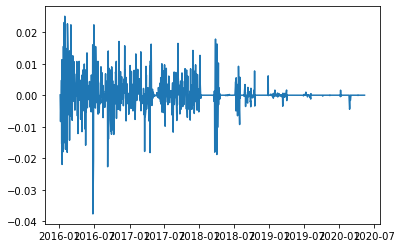

In [23]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])
plt.plot(ensemble_strat)

In [24]:
ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,6.341%
Cumulative returns,30.69%
Annual volatility,7.578%
Sharpe ratio,0.85
Calmar ratio,0.89
Stability,0.82
Max drawdown,-7.097%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.10,2017-03-01,2017-04-19,2017-09-19,145
1,5.77,2016-06-23,2016-06-27,2016-07-11,13
2,5.44,2016-01-05,2016-01-20,2016-02-25,38
3,4.94,2016-08-15,2016-10-13,2016-12-07,83
4,3.86,2016-04-20,2016-05-19,2016-06-08,36


C:\Users\Alex\Anaconda3\lib\site-packages\pyfolio\tears.py:906: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn('Passed returns do not overlap with any'


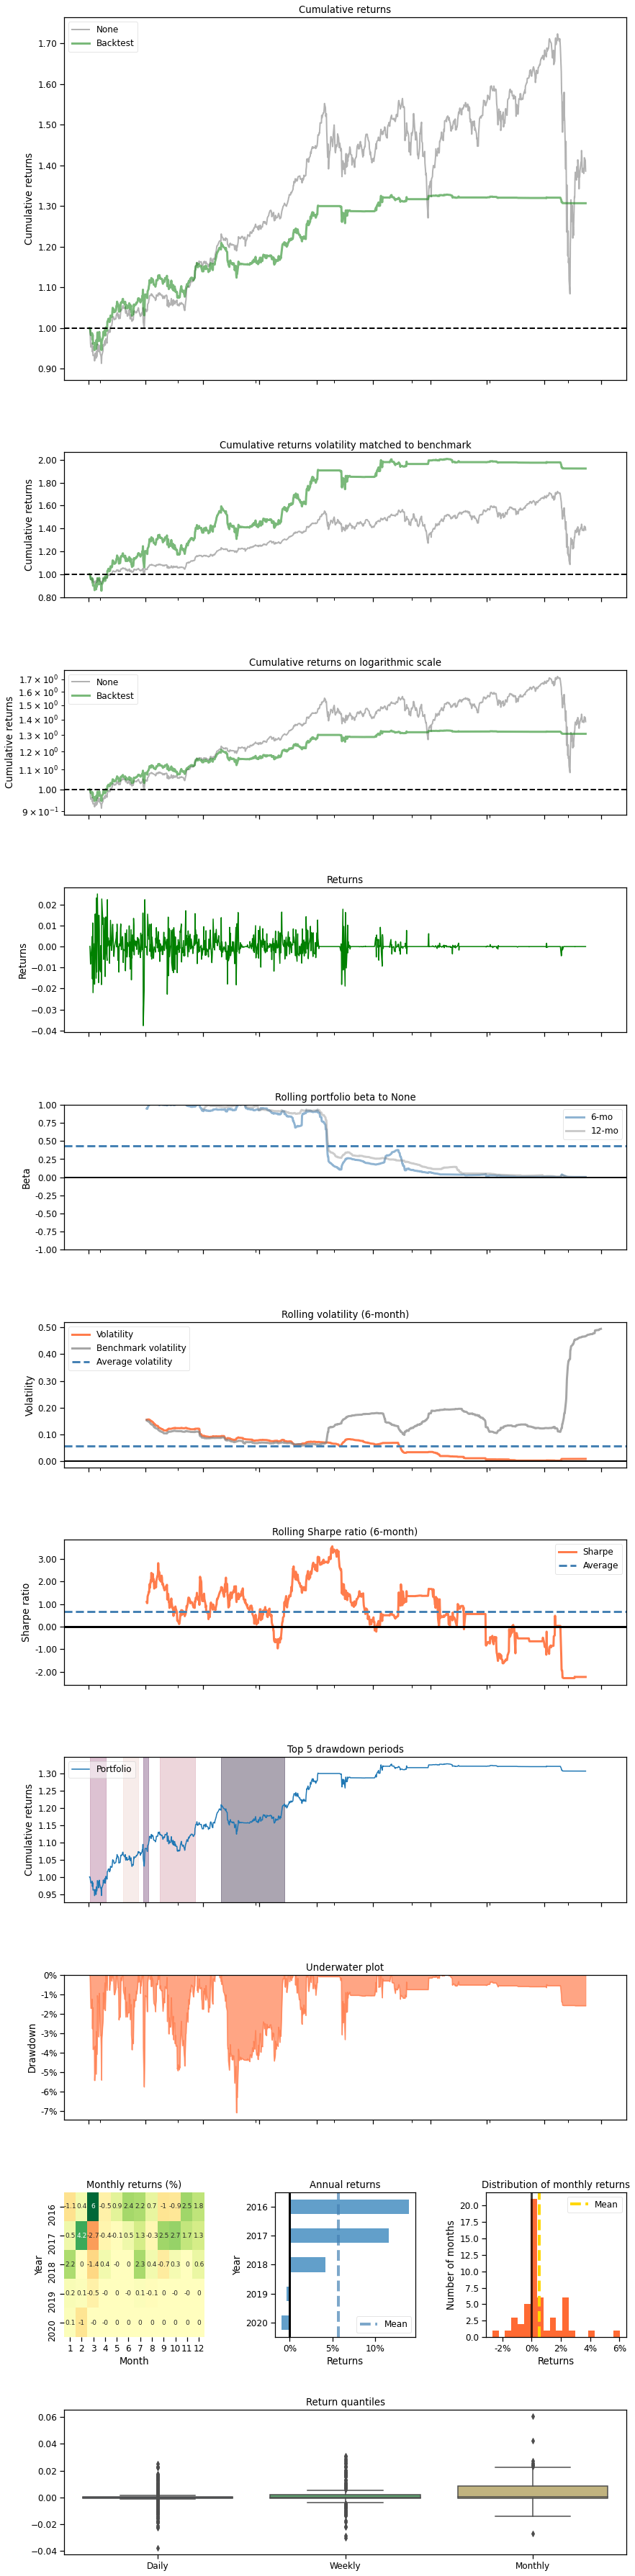

In [25]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)

## PPO

In [26]:
ensemble_account_value = get_account_value('ensemble')

0.8459208692763136


In [27]:
loss_raw = pd.read_csv('results/convergence/loss.csv')

In [28]:
loss = loss_raw.dropna().reset_index(drop=True)

In [29]:
loss

,update,pg_mix_loss,pg_ex_loss,value_mix_loss,value_ex_loss,policy_entropy,policy_loss,intrinsic_loss
0,1,1.065259,0.425478,0.000746,0.198632,3.401176,1.031621,0.624110
1,2,1.038673,0.213329,0.000753,0.156092,3.401175,1.005038,0.369421
2,3,-29.244547,0.166693,0.594091,0.165953,3.401176,-28.981513,0.332647
3,4,-26.077099,0.585234,0.453990,0.630310,3.401175,-25.884116,1.215544
4,5,-28.781052,-1.087121,0.592688,1.589600,3.401176,-28.518719,0.502479
...,...,...,...,...,...,...,...,...
107995,5996,-36.199180,1.736658,0.968528,18.112217,3.321145,-35.748128,19.848875
107996,5997,-13.170888,-6.089965,0.243877,71.103195,3.312335,-13.082073,65.013230
107997,5998,-45.691690,-0.647501,1.624582,269.963870,3.318703,-44.912585,269.316366
107998,5999,-88.899310,-3.350568,16.966803,137.468120,3.323171,-80.449138,134.117556


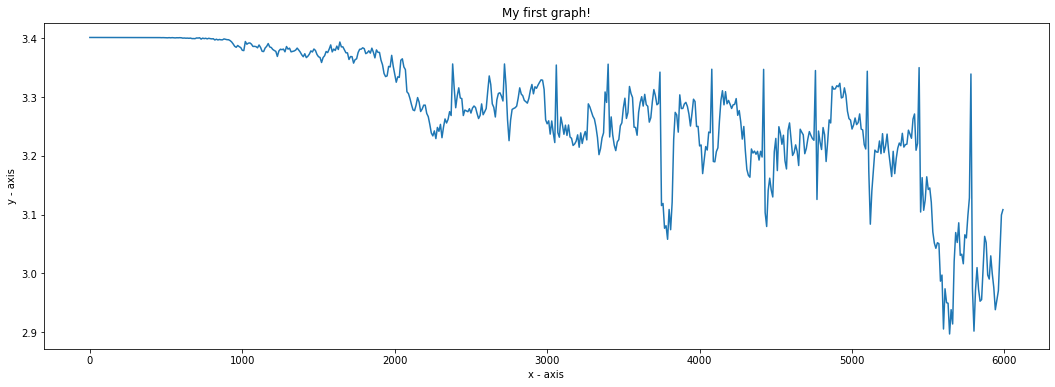

In [30]:
# plotting the points
plt.figure(figsize=(18,6))
plt.plot(loss.iloc[[x*10 for x in range(0,600)], 5])
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

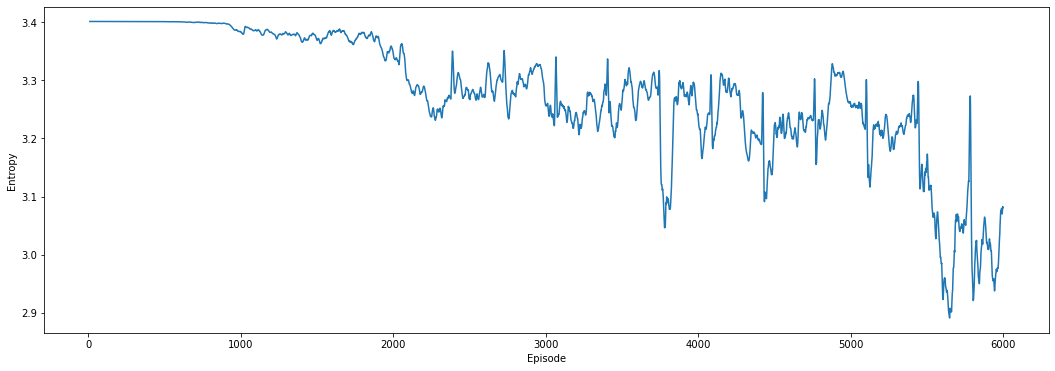

In [31]:
smoothed_loss = pd.Series.rolling(pd.Series(loss.iloc[[x for x in range(0*6000,1*6000)], 5]), 10).mean()
smoothed_loss = [elem for elem in smoothed_loss]
plt.figure(figsize=(18,6))
plt.plot(smoothed_loss)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Entropy')
plt.show()

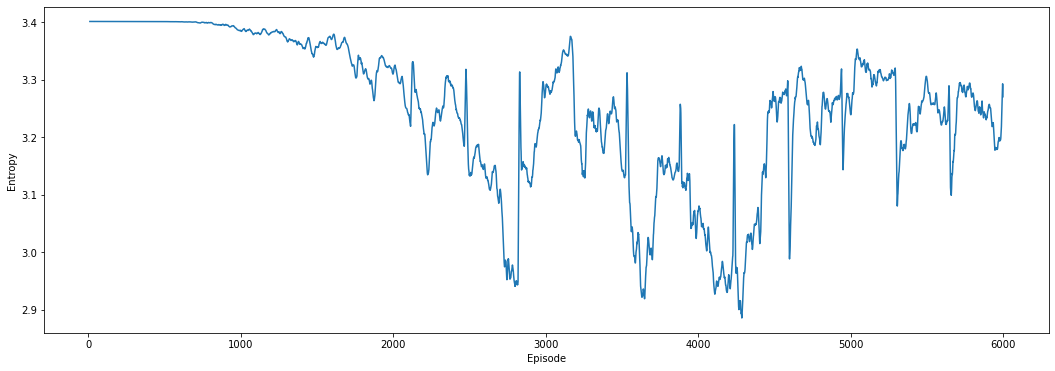

In [32]:
smoothed_loss = pd.Series.rolling(pd.Series(loss.iloc[[x for x in range(1*6000,2*6000)], 5]), 10).mean()
smoothed_loss = [elem for elem in smoothed_loss]
plt.figure(figsize=(18,6))
plt.plot(smoothed_loss)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Entropy')
plt.show()

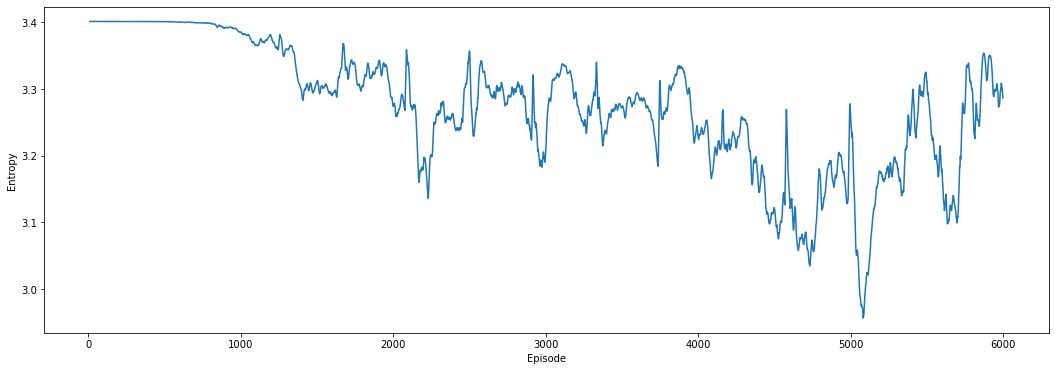

In [33]:
smoothed_loss = pd.Series.rolling(pd.Series(loss.iloc[[x for x in range(6*6000,7*6000)], 5]), 10).mean()
smoothed_loss = [elem for elem in smoothed_loss]
plt.figure(figsize=(18,6))
plt.plot(smoothed_loss)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Entropy')
plt.show()

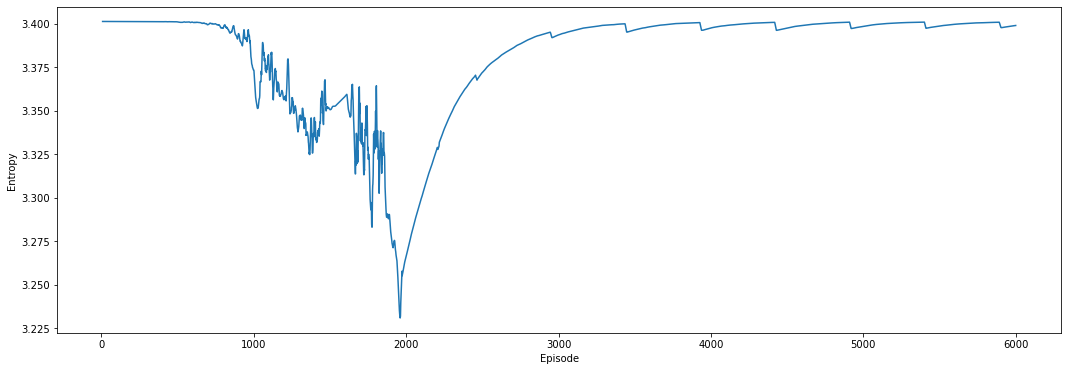

In [34]:
smoothed_loss = pd.Series.rolling(pd.Series(loss.iloc[[x for x in range(12*6000,13*6000)], 5]), 10).mean()
smoothed_loss = [elem for elem in smoothed_loss]
plt.figure(figsize=(18,6))
plt.plot(smoothed_loss)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Entropy')
plt.show()

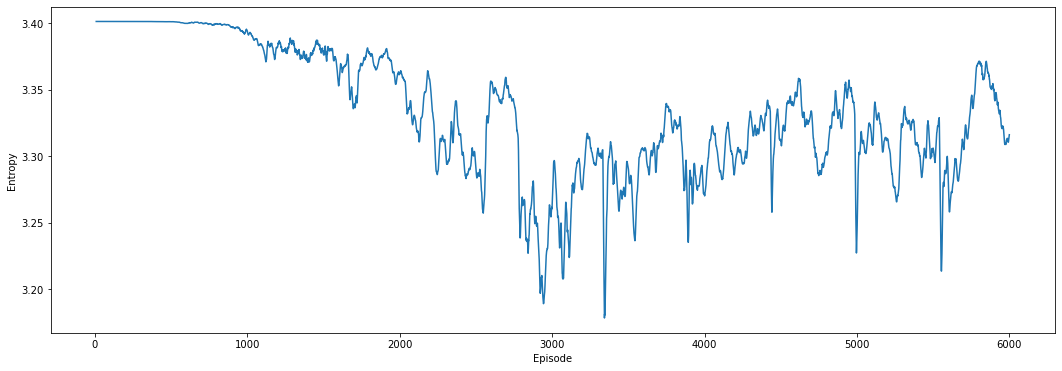

In [35]:
smoothed_loss = pd.Series.rolling(pd.Series(loss.iloc[[x for x in range(17*6000,18*6000)], 5]), 10).mean()
smoothed_loss = [elem for elem in smoothed_loss]
plt.figure(figsize=(18,6))
plt.plot(smoothed_loss)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Entropy')
plt.show()

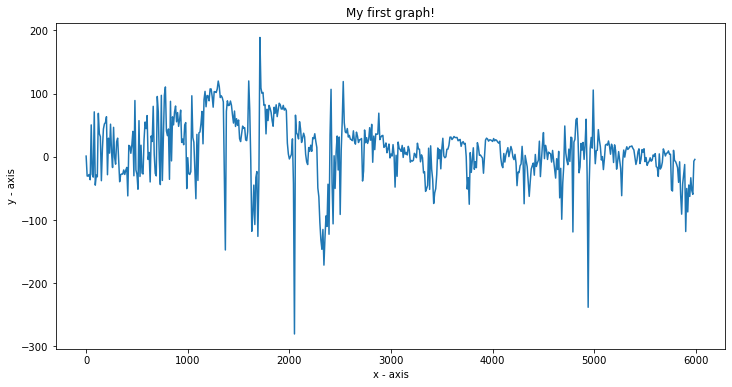

In [36]:
# plotting the points
plt.figure(figsize=(12,6))
plt.plot(loss.iloc[[x * 10 for x in range(0*600,1*600)], 1])
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

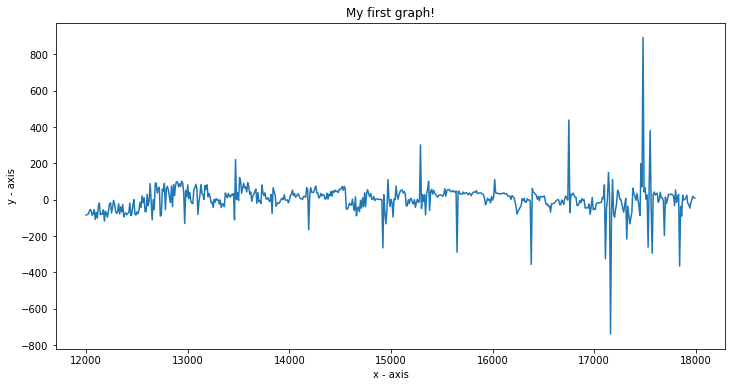

In [37]:
# plotting the points
plt.figure(figsize=(12,6))
plt.plot(loss.iloc[[x * 10 for x in range(2*600,3*600)], 1])
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

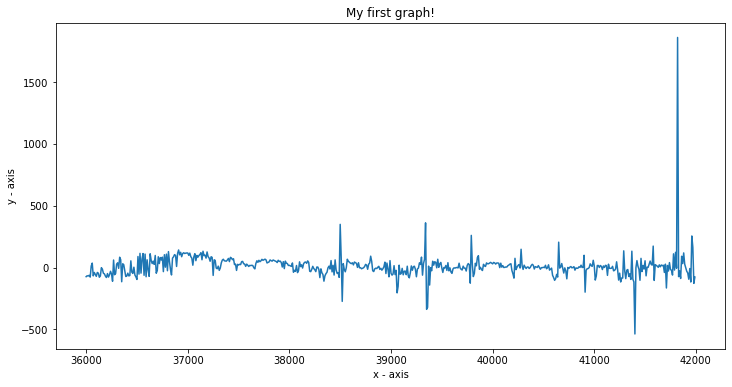

In [38]:
# plotting the points
plt.figure(figsize=(12,6))
plt.plot(loss.iloc[[x * 10 for x in range(6*600,7*600)], 1])
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
#plt.ylim((-500,500))
#plt.axhline(y=200, color='r', linestyle='-')
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

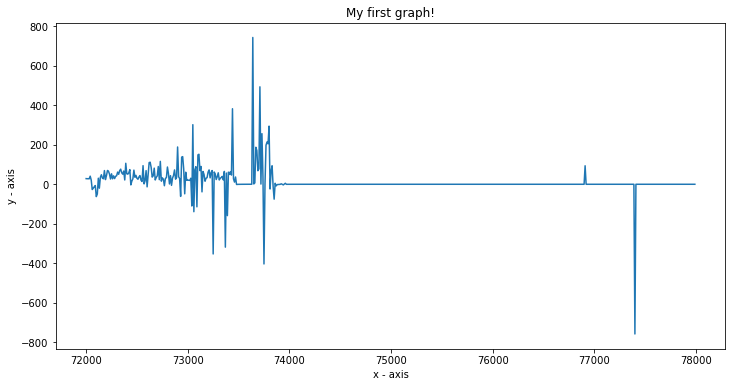

In [39]:
# plotting the points
plt.figure(figsize=(12,6))
plt.plot(loss.iloc[[x * 10 for x in range(12*600,13*600)], 1])
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
#plt.ylim((-500,500))
#plt.axhline(y=200, color='r', linestyle='-')
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

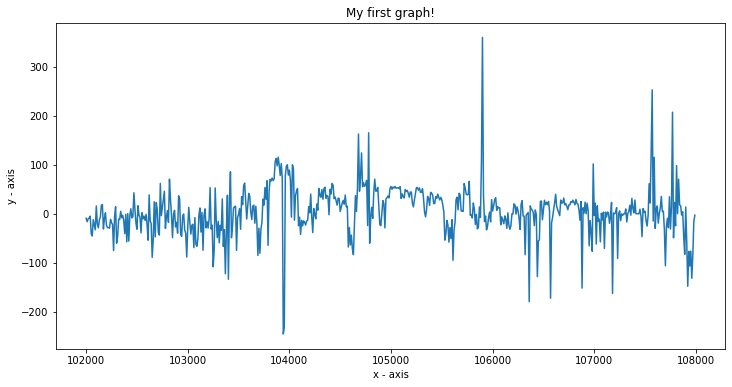

In [40]:
# plotting the points
plt.figure(figsize=(12,6))
plt.plot(loss.iloc[[x * 10 for x in range(17*600,18*600)], 1])
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
#plt.ylim((-500,500))
#plt.axhline(y=200, color='r', linestyle='-')
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

Start date,2016-01-04
End date,2020-06-30
Total months,53
,Backtest
Annual return,9.54%
Cumulative returns,50.522%
Annual volatility,20.518%
Sharpe ratio,0.55
Calmar ratio,0.26
Stability,0.77
Max drawdown,-37.086%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.09,2020-02-12,2020-03-23,NaT,NaN
1,18.77,2018-10-03,2018-12-24,2019-07-03,196
2,11.58,2018-01-26,2018-03-23,2018-09-20,170
3,8.73,2016-01-05,2016-02-11,2016-03-11,49
4,6.87,2019-07-15,2019-08-14,2019-11-04,81


C:\Users\Alex\Anaconda3\lib\site-packages\pyfolio\tears.py:906: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn('Passed returns do not overlap with any'


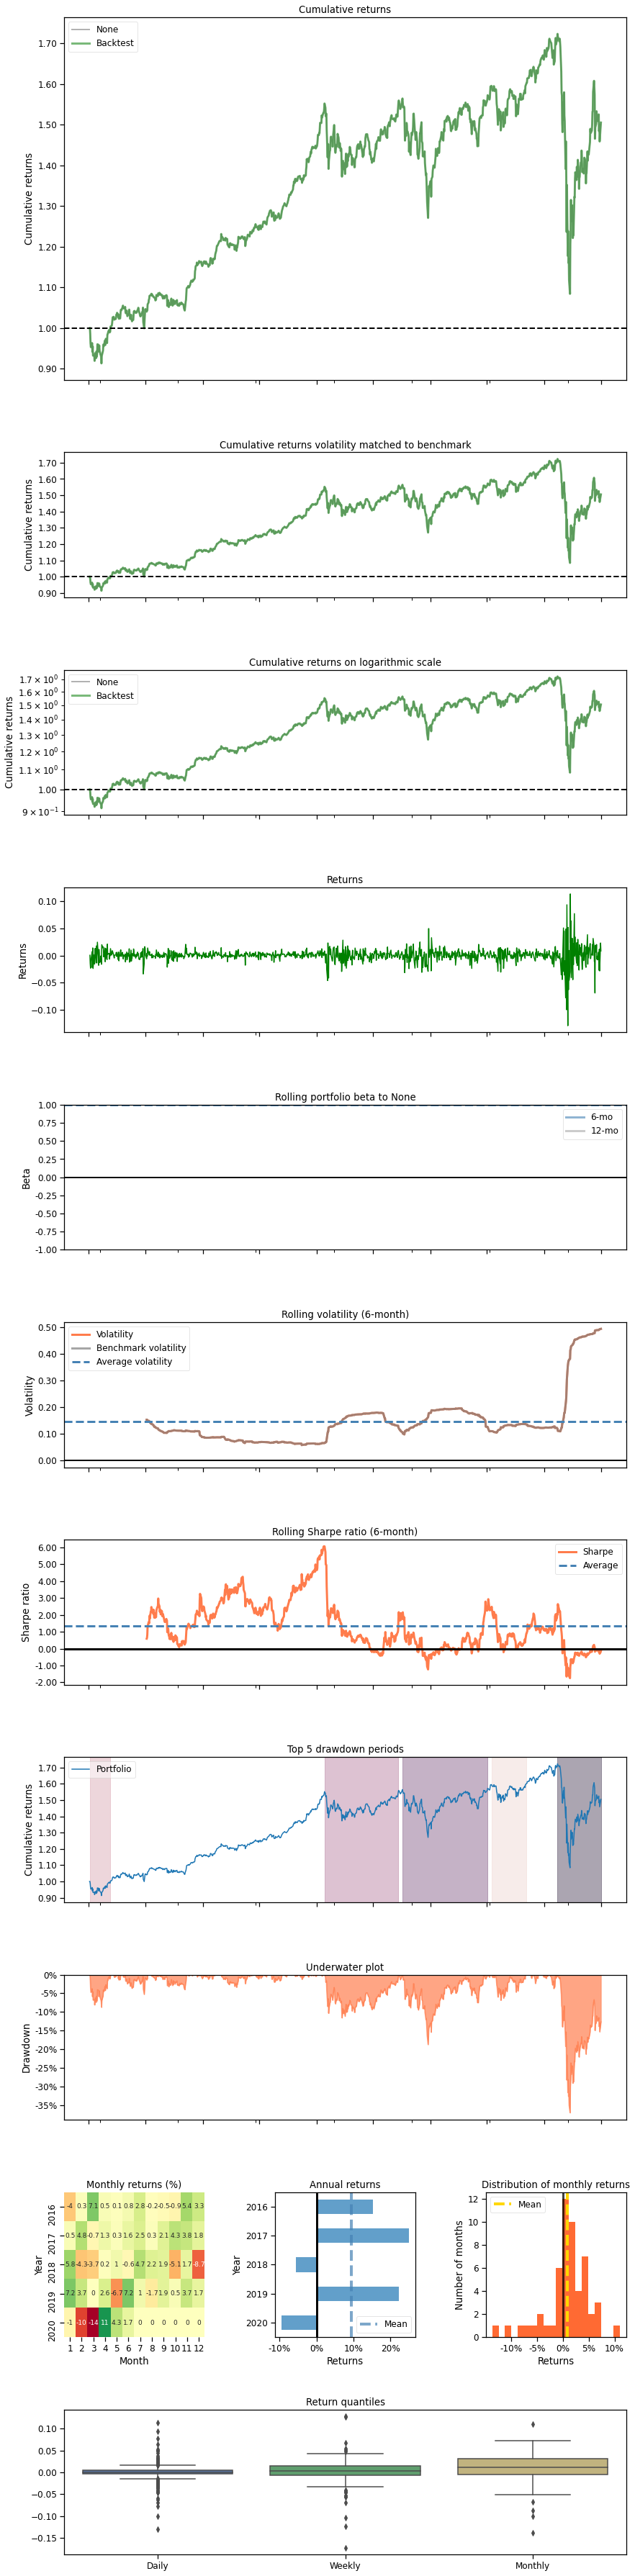

In [41]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dow_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [42]:
a = [0.53479, 0.42237, 0.4838, 0.38923, 0.3657, 0.51759, 0.41508, 0.71978, 0.33011, 0.5842]
sum(a)/10
#0.01 in_coef cumlative returns

0.476265

In [43]:
b=[1.31, 1.09, 1.24, 1.01, 1.00, 1.29, 1.10, 1.60, 0.81, 1.37]
sum(b)/10
#0.01 in_coef SR

1.182